### Preproccessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Neural_Network_Charity_Analysis/charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN','NAME'],inplace=True)
application_df.head()

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0              T10       Independent          C1000    ProductDev   
1               T3       Independent          C2000  Preservation   
2               T5  CompanySponsored          C3000    ProductDev   
3               T3  CompanySponsored          C2000  Preservation   
4               T3       Independent          C1000     Heathcare   

   ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  \
0   Association       1              0                      N     5000   
1  Co-operative       1         1-9999                      N   108590   
2   Association       1              0                      N     5000   
3         Trust       1    10000-24999                      N     6692   
4         Trust       1  100000-499999                      N   142590   

   IS_SUCCESSFUL  
0              1  
1              1  
2              0  
3              1  
4              1

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = application_df['APPLICATION_TYPE'].value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

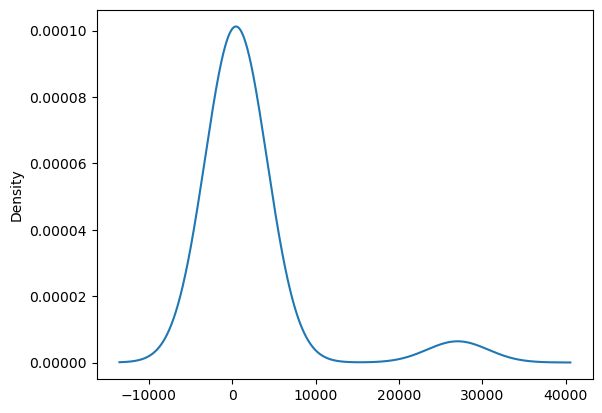

In [5]:
# Visualize the value counts of APPLICATION_TYPE
app_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application= list(app_counts[app_counts < 500].index)
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df['CLASSIFICATION'].value_counts()
class_counts.head(10)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

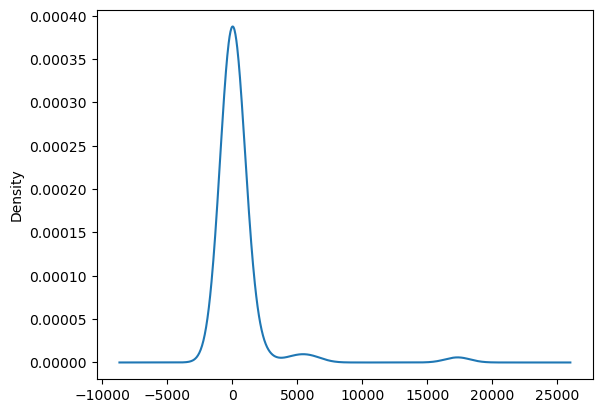

In [8]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts<1800].index)
# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\Admin\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  \
0                     0.0                   1.0                   0.0   
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   

   APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  0.0   
2                  0.0                  0.0                  1.0   
3                  1.0                  0.0                  0.0   
4                  1.0                  0.0                  0.0   

   APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  APPLICATION_TYPE_T8  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   AFFILIATION_CompanySponsored  ...  INCOME_AMT_1-9999  \
0                           0.0  ...                0.0   
1                           0.0  ...                1.0   
2                           1.0  ...                0.0   
3                           1.0  ...                0.0   
4                           0.0  ...                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                0.0                       1.0                       0.0  
1                0.0                       1.0                       0.0  
2                0.0                       1.0                       0.0  
3                0.0                       1.0                       0.0  
4                0.0                       1.0                       0.0  

[5 rows x 41 columns]

In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True,right_index=True)
application_df = application_df.drop(application_cat,1)
application_df

C:\Users\Admin\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


STATUS   ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  \
0           1      5000              1                     0.0   
1           1    108590              1                     0.0   
2           1      5000              0                     0.0   
3           1      6692              1                     0.0   
4           1    142590              1                     0.0   
...       ...       ...            ...                     ...   
34294       1      5000              0                     0.0   
34295       1      5000              0                     0.0   
34296       1      5000              0                     0.0   
34297       1      5000              1                     0.0   
34298       1  36500179              0                     0.0   

       APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  \
0                       1.0                   0.0                  0.0   
1                       0.0                   0.0                  1.0   
2                       0.0                   0.0                  0.0   
3                       0.0                   0.0                  1.0   
4                       0.0                   0.0                  1.0   
...                     ...                   ...                  ...   
34294                   0.0                   0.0                  0.0   
34295                   0.0                   0.0                  0.0   
34296                   0.0                   0.0                  1.0   
34297                   0.0                   0.0                  0.0   
34298                   0.0                   0.0                  1.0   

       APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  ...  \
0                      0.0                  0.0                  0.0  ...   
1                      0.0                  0.0                  0.0  ...   
2                      0.0                  1.0                  0.0  ...   
3                      0.0                  0.0                  0.0  ...   
4                      0.0                  0.0                  0.0  ...   
...                    ...                  ...                  ...  ...   
34294                  1.0                  0.0                  0.0  ...   
34295                  1.0                  0.0                  0.0  ...   
34296                  0.0                  0.0                  0.0  ...   
34297                  0.0                  1.0                  0.0  ...   
34298                  0.0                  0.0                  0.0  ...   

       INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                    0.0                     0.0                       0.0   
1                    1.0                     0.0                       0.0   
2                    0.0                     0.0                       0.0   
3                    0.0                     1.0                       0.0   
4                    0.0                     0.0                       1.0   
...                  ...                     ...                       ...   
34294                0.0                     0.0                       0.0   
34295                0.0                     0.0                       0.0   
34296                0.0                     0.0                       0.0   
34297                0.0                     0.0                       0.0   
34298                0.0                     0.0                       0.0   

       INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                     0.0               0.0                     0.0   
1                     0.0               0.0                     0.0   
2                     0.0               0.0                     0.0   
3                     0.0               0.0                     0.0   
4                     0.0               0.0                     0.0   
...                   ...            

In [13]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(columns = ["IS_SUCCESSFUL"]).values
y = application_df.IS_SUCCESSFUL.values
# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,stratify=y)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### attempt 1

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
numinputfeatures = len(X_train[0])
layer1nodes = 99
layer2nodes = 33
layer3nodes = 11
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units = layer1nodes, activation = "relu", input_dim = numinputfeatures))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units = layer2nodes, activation="relu"))

# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units = layer3nodes, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units = 1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 99)                4356      
                                                                 
 dense_1 (Dense)             (None, 33)                3300      
                                                                 
 dense_2 (Dense)             (None, 11)                374       
                                                                 
 dense_3 (Dense)             (None, 1)                 12        
                                                                 
Total params: 8,042
Trainable params: 8,042
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [35]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

In [18]:
# Train the model
fit_model = nn_model.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5734 - accuracy: 0.7117
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5533 - accuracy: 0.7309
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5511 - accuracy: 0.7306
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5488 - accuracy: 0.7314
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5483 - accuracy: 0.7331
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5466 - accuracy: 0.7315
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5465 - accuracy: 0.7327
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5458 - accuracy: 0.7336
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5453 - accuracy: 0.7325
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5447 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.5346 - accuracy: 0.7392
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5344 - accuracy: 0.7402
Epoch 83/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5343 - accuracy: 0.7389
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5344 - accuracy: 0.7395
Epoch 85/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5342 - accuracy: 0.7399
Epoch 86/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5347 - accuracy: 0.7399
Epoch 87/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5341 - accuracy: 0.7393
Epoch 88/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5339 - accuracy: 0.7400
Epoch 89/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5338 - accuracy: 0.7393
Epoch 90/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5339 - accuracy: 

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5606 - accuracy: 0.7303 - 353ms/epoch - 1ms/step
Loss: 0.560627818107605, Accuracy: 0.7302623987197876


### attempt 2

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
numinputfeatures = len(X_train[0])
layer1nodes = 27
layer2nodes = 9
layer3nodes = 3
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units = layer1nodes, activation = "relu", input_dim = numinputfeatures))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units = layer2nodes, activation="relu"))

# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units = layer3nodes, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units = 1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 27)                1188      
                                                                 
 dense_5 (Dense)             (None, 9)                 252       
                                                                 
 dense_6 (Dense)             (None, 3)                 30        
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 1,474
Trainable params: 1,474
Non-trainable params: 0
_________________________________________________________________


In [21]:
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [22]:
fit_model = nn_model.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.6294 - accuracy: 0.6782
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5828 - accuracy: 0.7261
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5722 - accuracy: 0.7281
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5674 - accuracy: 0.7301
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5650 - accuracy: 0.7301
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5612 - accuracy: 0.7310
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5601 - accuracy: 0.7315
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5593 - accuracy: 0.7312
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5576 - accuracy: 0.7311
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5539 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.5394 - accuracy: 0.7369
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5388 - accuracy: 0.7386
Epoch 83/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5387 - accuracy: 0.7373
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5385 - accuracy: 0.7377
Epoch 85/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5388 - accuracy: 0.7376
Epoch 86/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5390 - accuracy: 0.7382
Epoch 87/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5390 - accuracy: 0.7378
Epoch 88/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5386 - accuracy: 0.7377
Epoch 89/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5390 - accuracy: 0.7375
Epoch 90/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5385 - accuracy: 

In [23]:
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5559 - accuracy: 0.7300 - 327ms/epoch - 1ms/step
Loss: 0.555855929851532, Accuracy: 0.7300291657447815


### attempt 3

In [24]:
percentileabove99 = application_df['ASK_AMT'].quantile(.99)
percentilebelow01 = application_df['ASK_AMT'].quantile(.01)
application_df_above99 = application_df[application_df['ASK_AMT']<percentileabove99]
application_dfcleaned = application_df_above99[application_df_above99['ASK_AMT']>percentilebelow01]
application_dfcleaned

STATUS  ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  \
1           1   108590              1                     0.0   
3           1     6692              1                     0.0   
4           1   142590              1                     0.0   
6           1    31452              1                     0.0   
7           1  7508025              1                     0.0   
...       ...      ...            ...                     ...   
34280       1   401661              0                     0.0   
34281       1    56261              1                     0.0   
34284       1  3384856              0                     0.0   
34287       1     6713              1                     0.0   
34289       1    20197              1                     0.0   

       APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  \
1                       0.0                   0.0                  1.0   
3                       0.0                   0.0                  1.0   
4                       0.0                   0.0                  1.0   
6                       0.0                   0.0                  1.0   
7                       0.0                   0.0                  1.0   
...                     ...                   ...                  ...   
34280                   0.0                   0.0                  1.0   
34281                   0.0                   0.0                  1.0   
34284                   0.0                   0.0                  1.0   
34287                   0.0                   0.0                  1.0   
34289                   0.0                   0.0                  1.0   

       APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  ...  \
1                      0.0                  0.0                  0.0  ...   
3                      0.0                  0.0                  0.0  ...   
4                      0.0                  0.0                  0.0  ...   
6                      0.0                  0.0                  0.0  ...   
7                      0.0                  0.0                  0.0  ...   
...                    ...                  ...                  ...  ...   
34280                  0.0                  0.0                  0.0  ...   
34281                  0.0                  0.0                  0.0  ...   
34284                  0.0                  0.0                  0.0  ...   
34287                  0.0                  0.0                  0.0  ...   
34289                  0.0                  0.0                  0.0  ...   

       INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
1                    1.0                     0.0                       0.0   
3                    0.0                     1.0                       0.0   
4                    0.0                     0.0                       1.0   
6                    0.0                     0.0                       1.0   
7                    0.0                     0.0                       0.0   
...                  ...                     ...                       ...   
34280                0.0                     0.0                       1.0   
34281                0.0                     0.0                       0.0   
34284                0.0                     0.0                       0.0   
34287                0.0                     0.0                       0.0   
34289                0.0                     0.0                       0.0   

       INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
1                     0.0               0.0                     0.0   
3                     0.0               0.0                     0.0   
4                     0.0               0.0                     0.0   
6                     0.0               0.0                     0.0   
7                     1.0               0.0                     0.0   
...                   ...               ...      

In [25]:
# Split our preprocessed data into our features and target arrays
X = application_dfcleaned.drop(columns = ["IS_SUCCESSFUL"]).values
y = application_dfcleaned.IS_SUCCESSFUL.values
# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,stratify=y)

In [26]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [27]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
numinputfeatures = len(X_train[0])
layer1nodes = 99
layer2nodes = 33
layer3nodes = 11
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units = layer1nodes, activation = "relu", input_dim = numinputfeatures))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units = layer2nodes, activation="relu"))

# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units = layer3nodes, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units = 1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 99)                4356      
                                                                 
 dense_9 (Dense)             (None, 33)                3300      
                                                                 
 dense_10 (Dense)            (None, 11)                374       
                                                                 
 dense_11 (Dense)            (None, 1)                 12        
                                                                 
Total params: 8,042
Trainable params: 8,042
Non-trainable params: 0
_________________________________________________________________


In [36]:
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
201/201 [==============================] - 1s 1ms/step - loss: 0.5373 - accuracy: 0.7199
Epoch 2/100
201/201 [==============================] - 0s 1ms/step - loss: 0.5349 - accuracy: 0.7222
Epoch 3/100
201/201 [==============================] - 0s 1ms/step - loss: 0.5358 - accuracy: 0.7225
Epoch 4/100
201/201 [==============================] - 0s 1ms/step - loss: 0.5347 - accuracy: 0.7214
Epoch 5/100
170/201 [========================>.....] - ETA: 0s - loss: 0.5310 - accuracy: 0.7268
Epoch 5: saving model to checkpoints\weights.05.hdf5
201/201 [==============================] - 0s 1ms/step - loss: 0.5349 - accuracy: 0.7228
Epoch 6/100
201/201 [==============================] - 0s 1ms/step - loss: 0.5347 - accuracy: 0.7206
Epoch 7/100
201/201 [==============================] - 0s 1ms/step - loss: 0.5366 - accuracy: 0.7230
Epoch 8/100
201/201 [==============================] - 0s 1ms/step - loss: 0.5344 - accuracy: 0.7228
Epoch 9/100
201/201 [==============================] -

179/201 [=========================>....] - ETA: 0s - loss: 0.5302 - accuracy: 0.7282
Epoch 65: saving model to checkpoints\weights.65.hdf5
201/201 [==============================] - 0s 1ms/step - loss: 0.5294 - accuracy: 0.7267
Epoch 66/100
201/201 [==============================] - 0s 1ms/step - loss: 0.5296 - accuracy: 0.7244
Epoch 67/100
201/201 [==============================] - 0s 1ms/step - loss: 0.5295 - accuracy: 0.7241
Epoch 68/100
201/201 [==============================] - 0s 1ms/step - loss: 0.5302 - accuracy: 0.7242
Epoch 69/100
201/201 [==============================] - 0s 1ms/step - loss: 0.5301 - accuracy: 0.7250
Epoch 70/100
182/201 [==========================>...] - ETA: 0s - loss: 0.5269 - accuracy: 0.7265
Epoch 70: saving model to checkpoints\weights.70.hdf5
201/201 [==============================] - 0s 1ms/step - loss: 0.5292 - accuracy: 0.7247
Epoch 71/100
201/201 [==============================] - 0s 1ms/step - loss: 0.5340 - accuracy: 0.7220
Epoch 72/100
201/201 

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

67/67 - 0s - loss: 0.6724 - accuracy: 0.6822 - 211ms/epoch - 3ms/step
Loss: 0.6723761558532715, Accuracy: 0.6822429895401001


In [30]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
layer1nodes = 99
layer2nodes = 33
layer3nodes = 11

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=layer1nodes, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=layer2nodes, activation="relu"))

# Third hidden layer
nn_new.add(tf.keras.layers.Dense(units=layer3nodes, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

67/67 - 0s - loss: 0.6724 - accuracy: 0.6822 - 244ms/epoch - 4ms/step
Loss: 0.6723761558532715, Accuracy: 0.6822429895401001


In [31]:
nn_new.save("AlphabetSoupCharity_Optimization.h5")